In [1]:
import numpy as np
from scipy.optimize import fsolve,root
import matplotlib.pyplot as plt

In [2]:
def tdoa_solver(x,*args):
    anchor_loc = args[0]
    tdoa_mat = args[1]
    
    a = []
    for i in np.arange(tdoa_mat.shape[0]):
        for j in np.arange(tdoa_mat.shape[1]):
            if(tdoa_mat[i,j]!=0):
                a.append(  -np.sqrt((x[0]-anchor_loc[i,0])**2+(x[1]-anchor_loc[i,1])**2)+np.sqrt((x[0]-anchor_loc[j,0])**2+(x[1]-anchor_loc[j,1])**2)-tdoa_mat[i,j]  )
    return a
    

In [2]:
def toa_solver(x,*args):
    anchor_loc = args[0]
    toa_vec = args[1]
    
    a = []
    for i in np.arange(toa_vec.shape[0]):
        if(toa_vec[i]!=0):
            a.append(  np.sqrt((x[0]-anchor_loc[i,0])**2+(x[1]-anchor_loc[i,1])**2)-toa_vec[i]  )
    return a
    

## Test TDoA

In [4]:
anchor_loc = np.array([[0,0],[10,0],[0,10],[10,10]])
tag_loc = np.array([4,6])
noise = 0.2

tag_anchor_distance = np.linalg.norm(anchor_loc-tag_loc, axis=1)
tdoa_mat = np.zeros([anchor_loc.shape[0],anchor_loc.shape[0]])
tdoa_mat[0,1:] = tag_anchor_distance[1:]-tag_anchor_distance[0] + noise*np.random.randn(tag_anchor_distance[1:].shape[0])

print(tdoa_mat)

[[ 0.          1.41558155 -1.45608819  0.11885086]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]]


In [5]:
print(root(tdoa_solver, [1, 1],args=(anchor_loc,tdoa_mat),method='lm'))


   cov_x: array([[ 0.36551699, -0.15654372],
       [-0.15654372,  0.29662124]])
    fjac: array([[ 2.08706581,  0.74345339,  0.66569517],
       [ 0.89384913, -1.65404079, -0.01971777]])
     fun: array([-0.04975396, -0.03331468,  0.0420075 ])
    ipvt: array([2, 1], dtype=int32)
 message: 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'
    nfev: 16
     qtf: array([-1.35749153e-07, -3.31124338e-07])
  status: 1
 success: True
       x: array([3.93243289, 5.95152741])


## Test TDoA with noise

In [6]:
anchor_loc = np.array([[0,0],[10,0],[0,10],[10,10]])
tag_loc_true = np.array([4,6])
noise = 0.2

tag_anchor_distance = np.linalg.norm(anchor_loc-tag_loc_true, axis=1)
tdoa_mat = np.zeros([anchor_loc.shape[0],anchor_loc.shape[0]])
tag_loc = np.zeros([100,2])
for tag_idx in range(100):
    tdoa_mat[0,1:] = tag_anchor_distance[1:]-tag_anchor_distance[0] + noise*np.random.randn(tag_anchor_distance[1:].shape[0])

    temp = root(tdoa_solver, [1, 1],args=(anchor_loc,tdoa_mat),method='lm')
    tag_loc[tag_idx,:] = temp.x


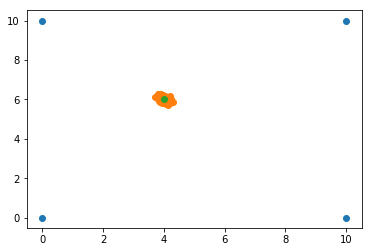

In [7]:
plt.scatter(anchor_loc[:,0],anchor_loc[:,1])
plt.scatter(tag_loc[:,0],tag_loc[:,1])
plt.scatter(tag_loc_true[0],tag_loc_true[1])


## Test ToA with noise

In [3]:
anchor_loc = np.array([[0,0],[10,0],[0,10],[10,10]])
tag_loc_true = np.array([4,6])
noise = 0.1

tag_anchor_distance = np.linalg.norm(anchor_loc-tag_loc_true, axis=1)
tag_loc = np.zeros([100,2])
for tag_idx in range(100):
    toa_vec = tag_anchor_distance + noise*np.random.randn(tag_anchor_distance.shape[0])

    temp = root(toa_solver, [1, 1],args=(anchor_loc,toa_vec),method='lm')
    tag_loc[tag_idx,:] = temp.x


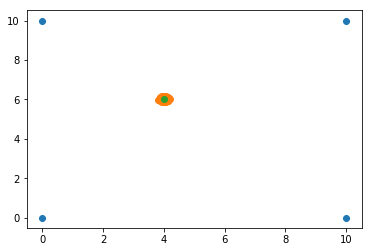

In [4]:
plt.scatter(anchor_loc[:,0],anchor_loc[:,1])
plt.scatter(tag_loc[:,0],tag_loc[:,1])
plt.scatter(tag_loc_true[0],tag_loc_true[1])


In [5]:
print(toa_vec)

[7.33840135 8.62874375 5.49532042 7.16889343]
